# Monte Carlo Simulation

This notebook provides introduction to Monte Carlo simulation using a toy example. The example is built upon a famous casino game known as **Rouulette** (Ruletka). During the game, players (bettros) make a bet on an integer, colour or a range and win if they bet was correct. Roulettes usually have 37 slots including one green (0), eighteen red (1-18) and eighteen black (19-36) slots.

In our case, we assume better is betting on a range 1-18 (which is equivalent to betting on red) and wins if randomly tossed ball ends up on a slot in that range. Otherwise, bettor loses. If former (win), his budget is increased by the amount of bet, if latter (loose) the budget is reduced by that amount.

In this example we will compare to bettors:
- **Simple bettor** - has fixed budget, has decided how many periods to play beforehand, but always bets the same amount independent of any other factor.
- **Smart bettor** - has fixed budget, has decided how many periods to play beforehand, bets the initial amount after winning, but doubles the bet if lost.

The simulation is expected to show that **Simple bettor** is a clear loser, while **Smart bettor**, if budget is enough, cab be a clear winner (in average terms).

As the ball is tossed randomly, we will need a random integer generator. We will as well plot results, so plotting libraries will be handy as well. We will start from developing the **spinner** function and then separate functions for simple and smart bettors. We will simulate both multiple (e.g. 100) times to see what happens.

Note: In both functions there is a components to make sure budget does not become negative. While it is active in simple bettor, for the smart one it is commented out for you to see what can happen if no condition is set on budget (i.e. budget can even become negative). To make it more realistic you are encouraged to take **#** out in **smart bettor** and uncomment the following component and see what happens:
```
# if budget<=0:
#   break
```

In [0]:
import random # to generate random inetegers
import matplotlib.pyplot as plt # to plot simulation
import seaborn as sns # to plot distribution
plt.rc('figure', figsize=(20.0, 10.0)) # make the default plots bigger

In [0]:
# the random spinner
def spinner():
    slot = random.randint(1,37)
    if slot == 0:
        return "lost"
    elif 1<=slot <= 18:
        return "won"
    elif 19<=slot<=36:
        return "lost"

In [0]:
# the simple bettor
def simple_bettor(budget,bet,periods):
    X_axis = []
    Y_axis = []

    currentPeriod = 1
    while currentPeriod <= periods:
        result = spinner()
        if result == "won":
            budget = budget + bet
        elif result == "lost":
            budget = budget - bet
        if budget<=0:
          break
        X_axis.append(currentPeriod)
        Y_axis.append(budget)
        currentPeriod = currentPeriod + 1
    
    plt.plot(X_axis,Y_axis)
    return Y_axis[-1]

In [0]:
# the smart/doubler bettor
def smart_bettor(budget,bet,periods):
    X_axis = []
    Y_axis = []

    currentPeriod = 1
    initial_bet = bet
    while currentPeriod <= periods:
        result = spinner()
        if result == "won":
            budget = budget + bet
            bet = initial_bet
        elif result == "lost":
            budget = budget - bet
            bet = bet*2
        
        #if budget<=0:
        #  break
        X_axis.append(currentPeriod)
        Y_axis.append(budget)
        currentPeriod = currentPeriod + 1
    
    plt.subplot(121)  
    plt.plot(X_axis,Y_axis)
    return Y_axis[-1]

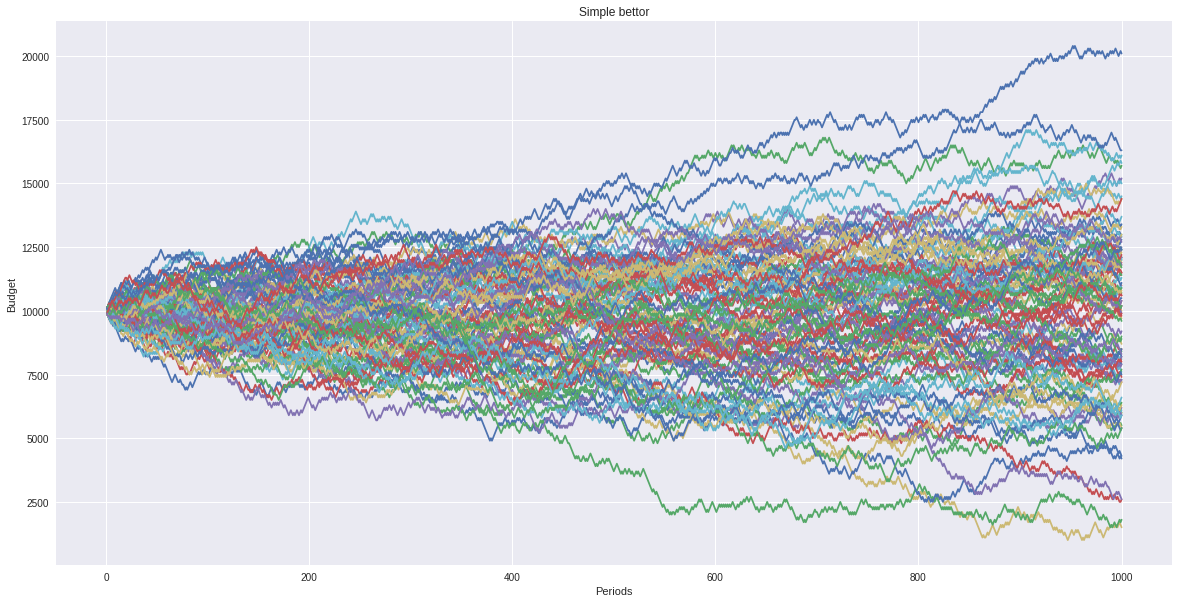

In [5]:
# the simulation of multiple possible futures (for simple)
futures = 1
while futures < 101:
    simple_bettor(10000,100,1000)
    futures = futures + 1

plt.title('Simple bettor')
plt.ylabel('Budget')
plt.xlabel('Periods')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


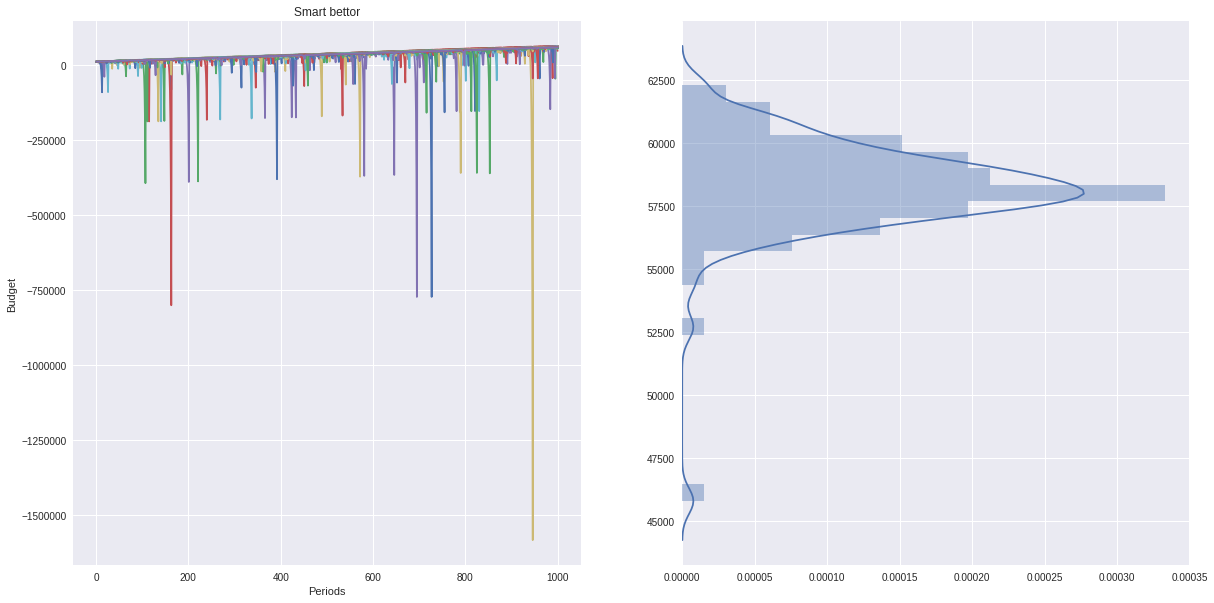

In [6]:
# the simulation of multiple possible futures (for smart)
futures = 1
outcomes = []
while futures < 101:
    outcomes.append(smart_bettor(10000,100,1000))
    futures = futures + 1

plt.title('Smart bettor')
plt.ylabel('Budget')
plt.xlabel('Periods')
plt.subplot(122)
sns.distplot(outcomes,bins=25,vertical=True)
#plt.subplots_adjust(wspace=0.5)
plt.show()